In [29]:
__depends__ = ["../outputs/eta_anomaly_var_wavenumber_freq_october.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_april.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_all.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_4320_october.npz",
               "../outputs/eta_anomaly_var_wavenumber_freq_4320_april.npz",
               "../WOA/radii.npz"]
__dest__ = []

In [3]:
__figpath__ = 'figs/'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.mlab import bivariate_normal

import cmocean
import seawater as sw

%matplotlib inline

In [40]:
speco = np.load(__depends__[0])
speca = np.load(__depends__[1])
spec = np.load(__depends__[2])
speco4320 = np.load(__depends__[3])
speca4320 = np.load(__depends__[4])
radii = np.load(__depends__[5])['radii']

In [8]:
spec.keys()

['ki', 'k', 'Eeta', 'iEeta', 'l', 'f']

In [30]:
f,ki = speco['f'],spec['ki']
Eetao = speco['iEeta']
Eetaa = speca['iEeta']
Eeta = spec['iEeta']

In [31]:
f, Eetao, Eetaa, Eeta = f[1:f.size/2], Eetao[:,1:f.size/2],Eetaa[:,1:f.size/2], Eeta[:,1:f.size/2]

/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [68]:
f0 = sw.f(36)

#f0 = sw.f(32.69)
N2 = (276.32*f0)**2
m = (1./150)
m2 = (1./500)
m3 = (1./550)
m4 = (1./1500)

k = np.logspace(-3,-1,100)

omg = np.sqrt(f0**2 + N2*((k/m)**2))*3600/2/np.pi
omg2 = np.sqrt(f0**2 + N2*((k/m2)**2))*3600/2/np.pi
omg3 = np.sqrt(f0**2 + N2*((k/m3)**2))*3600/2/np.pi
omg4 = np.sqrt(f0**2 + N2*((k/m4)**2))*3600/2/np.pi

rd1 = 2*np.pi*radii[0]
rd2 = 2*np.pi*radii[1]
rd3 = 2*np.pi*radii[2]
rd4 = 2*np.pi*radii[3]
rd5 = 2*np.pi*radii[4]

omg_1 = f0*np.sqrt(1 + (k*rd1)**2)*3600/2/np.pi
omg_2 = f0*np.sqrt(1 + (k*rd2)**2)*3600/2/np.pi
omg_3 = f0*np.sqrt(1 + (k*rd3)**2)*3600/2/np.pi
omg_4 = f0*np.sqrt(1 + (k*rd4)**2)*3600/2/np.pi
omg_5 = f0*np.sqrt(1 + (k*rd5)**2)*3600/2/np.pi

m2 = 1./12.4
f0 = f0*3600/(2*np.pi)

In [69]:
RatioEeta = Eetao.T/Eetaa.T
RatioEeta = np.ma.masked_array(RatioEeta,Eetao.T<1.e-2)

In [70]:
def plt_freqs():
    plt.plot(k,omg_1,'k')
    plt.plot(k,omg_4,'k')
    plt.text(1./38,.385,r'mode 1',fontsize=14,rotation=37.5)
    plt.text(1./25,.17,r'mode 4',fontsize=14,rotation=36)
    plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
    plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
    plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
    plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
    plt.text(1/14.5,.75*f0,'f$_0$',fontsize=14)
    plt.text(1./350,2.1*f0,'2f$_0$',fontsize=14)

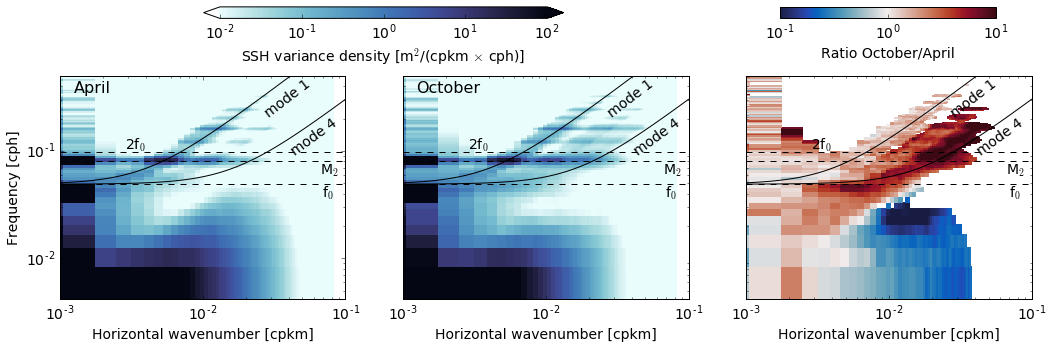

In [71]:
vmin, vmax = 1.e-2, 1.e2

fig = plt.figure(figsize=(20,4))

ax = plt.subplot(131)
plt.pcolormesh(ki,f,Eetaa.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt_freqs()
plt.xlim(1.e-3,1/5./2.)
plt.ylim(0,.5)

plt.text(1/800,.35,'April',color='k',fontsize=16)

ax = plt.subplot(132)
cdensity = plt.pcolormesh(ki,f,Eetao.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt_freqs()

plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.yticks([])
plt.text(1/800,.35,'October',color='k',fontsize=16)

ax = plt.subplot(133)
cratio = plt.pcolormesh(ki,f,RatioEeta,norm=LogNorm(vmin=.1,vmax=10),cmap=cmocean.cm.balance)
plt_freqs()
    
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.yticks([])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.625, 1.1, 0.15, 0.04])
fig.colorbar(cratio, cax=cbar_ax,label=r'Ratio October/April',orientation='horizontal')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.225, 1.1, 0.25, 0.04])
fig.colorbar(cdensity, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]'
             ,extend='both',orientation='horizontal')

#plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_Seasonal.pdf",dpi=100,bbox_inches='tight')

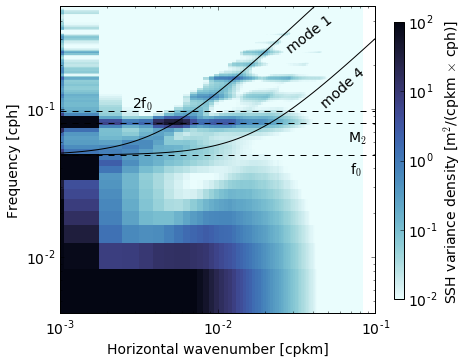

In [72]:
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
cratio = plt.pcolormesh(ki,f,Eeta.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
plt.plot(k,omg_1,'k')
plt.plot(k,omg_4,'k')
plt.text(1./38,.385,r'mode 1',fontsize=14,rotation=37.5)
plt.text(1./23,.17,r'mode 4',fontsize=14,rotation=42)
plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
plt.text(1/14.5,.75*f0,'f$_0$',fontsize=14)
plt.text(1./350,2.1*f0,'2f$_0$',fontsize=14)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, .16, 0.02, 0.7])
fig.colorbar(cratio, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]')
plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_TimeAveraged.pdf",dpi=100,bbox_inches='tight')

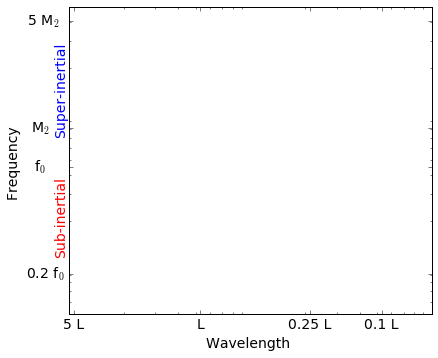

In [61]:
# plot the frame for schematics...
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
#plt.plot(k,omg_3,'k')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(5.e-3,.5)

f0, m2 = 1/22.,1./12.4
Ld = 2*np.pi*30.
plt.yticks([0.2*f0,f0,m2,5*m2],[r"0.2 f$_0$",r"f$_0$     ",r"M$_2$    ", r"5 M$_2$  "])
plt.xticks([1/Ld/5,1./Ld,1/Ld/0.25,1/Ld/.1],["5 L","L","0.25 L","0.1 L"])
plt.xlabel("Wavelength ")
plt.ylabel("Frequency ")

plt.text(.825e-3,1./4,"Super-inertial",rotation="vertical",
         fontsize=14,color='blue')
plt.text(.825e-3,1./30,"Sub-inertial",rotation="vertical",
         fontsize=14,color='red')

plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_frame.pdf",dpi=100,bbox_inches='tight')

## LLC4320, 1/48$^\circ$

In [56]:
f4320,ki4320 = speco4320['f'],speco4320['ki']
Eetao4320 = speco4320['iEeta']
Eetaa4320 = speca4320['iEeta']

In [57]:
f4320, Eetao4320, Eetaa4320 = f4320[1:f4320.size/2], Eetao4320[:,1:f4320.size/2],Eetaa4320[:,1:f4320.size/2]

/Users/crocha/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [58]:
RatioEeta4320 = Eetao4320.T/Eetaa4320.T
RatioEeta4320 = np.ma.masked_array(RatioEeta4320,Eetao4320.T<1.e-2)

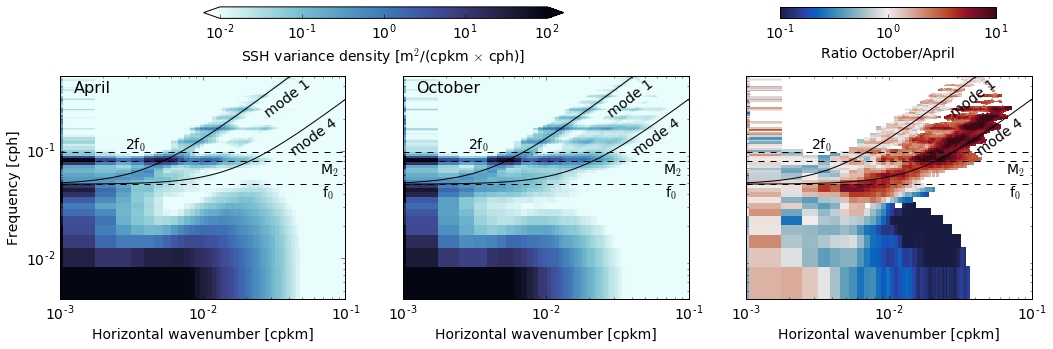

In [59]:
vmin, vmax = 1.e-2, 1.e2

fig = plt.figure(figsize=(20,4))

ax = plt.subplot(131)
plt.pcolormesh(ki4320,f4320,Eetaa4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt_freqs()
plt.xlim(1.e-3,1/5./2.)
plt.ylim(0,.5)

plt.text(1/800,.35,'April',color='k',fontsize=16)

ax = plt.subplot(132)
cdensity = plt.pcolormesh(ki4320,f4320,Eetao4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlabel("Horizontal wavenumber [cpkm]")
plt_freqs()

plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.yticks([])
plt.text(1/800,.35,'October',color='k',fontsize=16)

ax = plt.subplot(133)
cratio = plt.pcolormesh(ki4320,f4320,RatioEeta4320,norm=LogNorm(vmin=.1,vmax=10),cmap=cmocean.cm.balance)
plt_freqs()
    
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.yticks([])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.625, 1.1, 0.15, 0.04])
fig.colorbar(cratio, cax=cbar_ax,label=r'Ratio October/April',orientation='horizontal')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.225, 1.1, 0.25, 0.04])
fig.colorbar(cdensity, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]'
             ,extend='both',orientation='horizontal')
#plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_4320_Seasonal.pdf",dpi=100,bbox_inches='tight')

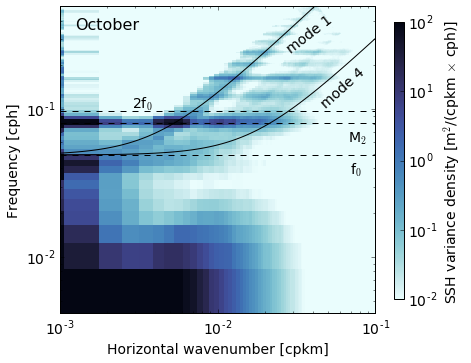

In [73]:
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
cratio = plt.pcolormesh(ki4320,f4320,Eetao4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
plt.plot(k,omg_1,'k')
plt.plot(k,omg_4,'k')
plt.text(1./38,.385,r'mode 1',fontsize=14,rotation=37.5)
plt.text(1./23,.17,r'mode 4',fontsize=14,rotation=42)
plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
plt.text(1/14.5,.75*f0,'f$_0$',fontsize=14)
plt.text(1./350,2.1*f0,'2f$_0$',fontsize=14)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt.text(1/800,.35,'October',color='k',fontsize=16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, .16, 0.02, 0.7])
fig.colorbar(cratio, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]')
plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_4320_October.pdf",dpi=100,bbox_inches='tight')

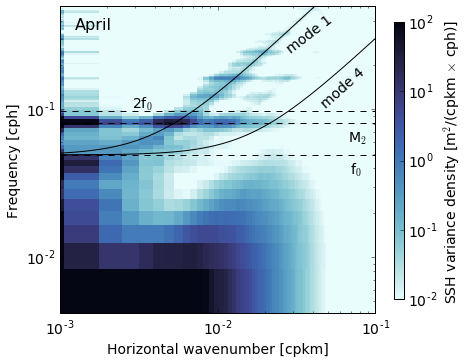

In [74]:
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
cratio = plt.pcolormesh(ki4320,f4320,Eetaa4320.T,norm=LogNorm(vmin=vmin,vmax=vmax),cmap=cmocean.cm.ice_r)
plt.plot(k,omg_1,'k')
plt.plot(k,omg_4,'k')
plt.text(1./38,.385,r'mode 1',fontsize=14,rotation=37.5)
plt.text(1./23,.17,r'mode 4',fontsize=14,rotation=42)
plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
plt.text(1/14.5,.75*f0,'f$_0$',fontsize=14)
plt.text(1./350,2.1*f0,'2f$_0$',fontsize=14)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt.text(1/800,.35,'April',color='k',fontsize=16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, .16, 0.02, 0.7])
fig.colorbar(cratio, cax=cbar_ax,label=r'SSH variance density [m$^2$/(cpkm $\times$ cph)]')
plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_4320_April.pdf",dpi=100,bbox_inches='tight')

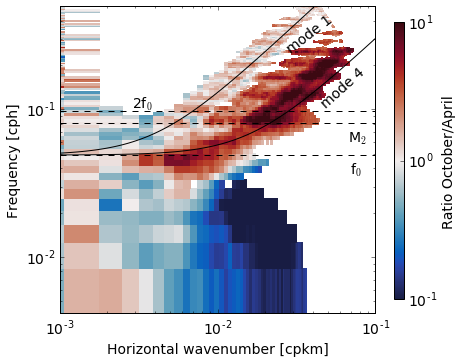

In [78]:
fig = plt.figure(figsize=(6.5,5.5))
ax = plt.subplot(111)
cratio = plt.pcolormesh(ki4320,f4320,RatioEeta4320,norm=LogNorm(vmin=.1,vmax=10),cmap=cmocean.cm.balance)
plt.plot(k,omg_1,'k')
plt.plot(k,omg_4,'k')
plt.text(1./38,.385,r'mode 1',fontsize=14,rotation=37.5)
plt.text(1./23,.17,r'mode 4',fontsize=14,rotation=42)
plt.plot([1.e-3,1.e-1],[f0,f0],'k--')
plt.plot([1.e-3,1.e-1],[m2,m2],'k--')
plt.plot([1.e-3,1.e-1],[2*f0,2*f0],'k--')
plt.text(1/15.,.75*m2,'M$_2$',fontsize=14)
plt.text(1/14.5,.75*f0,'f$_0$',fontsize=14)
plt.text(1./350,2.1*f0,'2f$_0$',fontsize=14)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposx='clip')
plt.xlim(1.e-3,1/5./2)
plt.ylim(0,.5)
plt.xlabel("Horizontal wavenumber [cpkm]")
plt.ylabel("Frequency [cph]")
plt.text(1/800,.35,'',color='k',fontsize=16)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, .16, 0.02, 0.7])
fig.colorbar(cratio, cax=cbar_ax,label=r'Ratio October/April')

plt.savefig(__figpath__+"SSHVariance_Wavenumber-Frequency_Spectrum_4320_Ratio.pdf",dpi=100,bbox_inches='tight')